## _`Car Price Prediction`_

- The Plan for the Project:
  1. First, we download the dataset.
  2. Next, we do some preliminary analysis of the data.
  3. After that, we set up a validation strategy to make sure our model produces cor
     rect predictions.
  4. Then we implement a linear regression model in Python and NumPy.
  5. Next, we cover feature engineering to extract important features from the data
     to improve the model.
  6. Finally, we see how to make our model stable with regularization and use it to
     predict car prices.


### _`Import Dependencies`_


In [29]:
# Numerical Computations
import numpy as np

# For Tabular Data
import pandas as pd

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure that plots are rendered within the Jupyter Notebook 
%matplotlib inline

### *`Load the Dataset`*

In [30]:
df = pd.read_csv('data.csv')

# Display the first 5 rows of the dataframe
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### *`Some Info about the DataFrame`*

In [31]:
# How many Rows and Columns are there in the dataset?
print("Number of Rows: ", df.shape[0]) # OR len(df)
print("Number of Columns: ", df.shape[1]) # OR len(df.columns)

Number of Rows:  11914
Number of Columns:  16


*`Some Inconsistencies in Column Names & Categories`*

In [34]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [12]:
# Check the Metadata of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

### *`Exploratory Data Analysis`*

*`msrp : manufacturer's suggested retail price -> Our Target`*

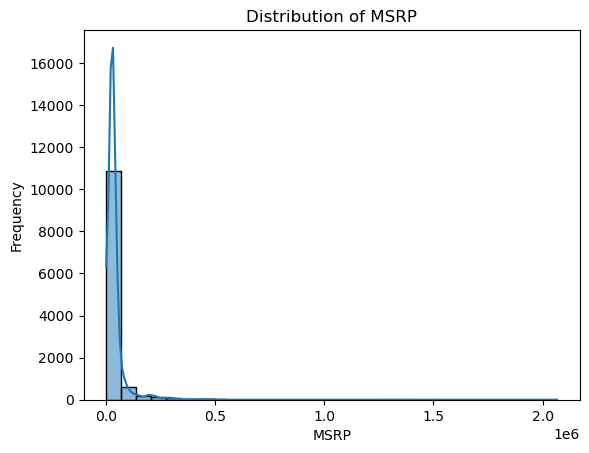

In [35]:
# Check the Distribution of the Target Variable
sns.histplot(df.msrp, bins=30, kde=True)
plt.title('Distribution of MSRP')
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.show()

*Oops: It is Right-Skewed because of Many Outliers*

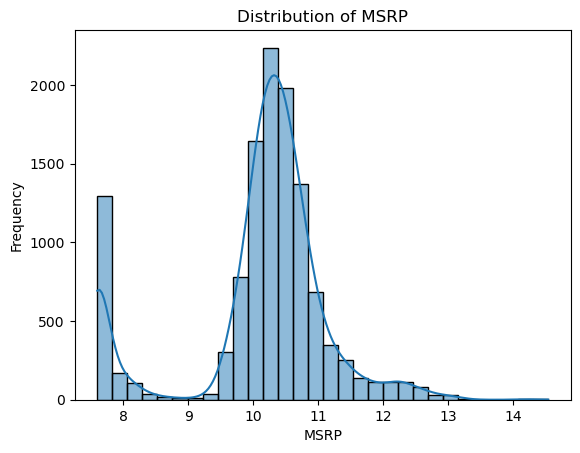

In [36]:
# Log Transformation to reduce Skewness and Reduce the effect of Outliers.
log_price = np.log1p(df['msrp'])

sns.histplot(log_price, bins=30, kde=True)
plt.title('Distribution of MSRP')
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.show()

*Approximately -> Bell-Shaped Curve As it has Large Peak in Lower Prices*

In [37]:
# Check the Missing Values in the Dataset

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

- ### *`Split DataFrame into 3 Parts:`*
    1. Training Part (60%)
    2. Validation Part (20%)
    3. Testing Part (20%)

In [38]:
n = len(df) # Total number of rows in the dataframe

n_val = int(0.2 * n)    # 20% of the data for validation
n_test = int(0.2 * n)   # 20% of the data for testing
n_train = n - (n_test + n_val)  # Remaining 60% of the data for training

print(n, n_val, n_test, n_train)

11914 2382 2382 7150


In [39]:
idx = np.arange(5)
print('before shuffle', idx)

np.random.shuffle(idx)
print('after shuffle', idx)

before shuffle [0 1 2 3 4]
after shuffle [4 0 1 3 2]


In [40]:
np.random.seed(2) # Set a random seed for reproducibility

idx = np.arange(n) # Create an array of indices from 0 to n-1
np.random.shuffle(idx) # Shuffle the indices randomly

df_shuffled = df.iloc[idx]  # Shuffled DataFrame by the Array (idx)

df_train = df_shuffled.iloc[: n_train].copy()
df_val = df_shuffled.iloc[n_train: n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val: ].copy()

In [41]:
# Apply the log transformation for each of the datasets
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)


del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

### *`Train a Linear Regression Model`*

In [42]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])  # Add a column of ones to include the intercept term

    XTX = X.T.dot(X) # X transpose multiplied by X
    XTX_inv = np.linalg.inv(XTX)    # Inverse of XTX
    
    w = XTX_inv.dot(X.T).dot(y)     # Weights of the linear regression model
    return w[0], w[1:]  # Return intercept and weights separately

#### *`Baseline Solution`*

In [43]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)

    X = df_num.values
    return X

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

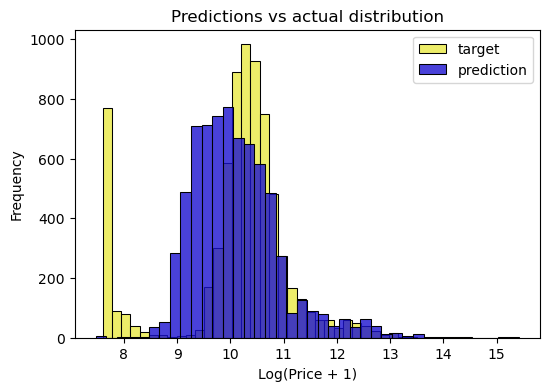

In [45]:
# Comparsion of the actual and predicted values
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color="#E1E106", alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color="#1b12d0", alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [46]:
# Simple Evaluation Metric
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error**2).mean()

    return np.sqrt(mse)

rmse(y_train, y_pred)

np.float64(0.7554192603920132)

In [47]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.7616530991301601)

### *`Feature Engineering`*